Machine Learning

 

 

 

 

 Data pre-precessing

(Based on Credit card Fraud, Boston House Price, and Car price prediction datasets.)) 

 

 



 

 



I have shosen the credit card fraud detection dataset, where the target variable is labeled "Class". Here the binary variable indicates whether the a transaction is fradulent(1) or legimate(0). The dataset is highly imbalanced, the fradulent transactions constituting only 0.172%. of all the transaction.




Imbalance data can impact significantly in machine learning models. Particularly, on the basis of this dataset. The fraudulent dataset consit only 0.17% of all the transaction, therefore the model models tend to be biased toward the majority class i.e. non- fraudulent.Here are some impacts performance:

a. Misleading accuracy: 
    Eventough if model perfrom 99% accuracy but it will completly fails at detecting fraud.

b. Low recall for fraudulent transactions: 
    Models tend to predict most fraudulent cases as non-fradulent, leading false nagetive.

c. Poor decision boundaries : 
    The results in decision boundaries heavily favours the majority class, making the model ineffective in fraud detection.

d. High precision but low recall:
    Some models might accurately predict fraud but they miss the large portion of actual fraud cases.





To improve the model performance indetecting the fraud cases, we may apply following techniqies to handle it.

a. Resampling techniques:
    Oversampling the minority class and undersamplng the majority class can help to handle the model. In oversampling we can duplicate the existing fraud cases or generate synthetic cases by SMOTE.
    In undersampling we can remove some non-fraudulent transactions to balance the dataset but may lead to loss the useful data.

b. Cost-Sensetive learning;
    Assign a higher misclassification cost to fraud cases so that the model penalizes missing a fraud case more than misclassifying a normal transaction.

c. Anomaly detection method:
    Since fraud cases are rare, they can be treated as anomalies. Use One-Class SVM, Isolation Forest, or Autoencoders to detect outliers (fraud cases) in the dataset.

d. Choosing the right matrix:
    Instead of accuracy, we can use Precision-Recall (PR) Curve,which help to shows the trade-off between precision and recall. F1 Score, which helps to balances precision and recall. ROC-AUC Score, which  measures how well the model distinguishes between fraud and non-fraud.

e. Ensemble method:
    Combine multiple models (Random Forest, XGBoost, LightGBM) to improve prediction robustness. Techniques like Bagging and Boosting help address imbalance.



    


In [158]:
#%%
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score






In [29]:
#%%
# Loading the dataset
file_path = '/Users/nawarajadhikari/Desktop/ASDS/6302/Projects/Project_2/creditcard.csv'
df = pd.read_csv(file_path)

# Display first few rows and the info of the dataset 
df.head(),df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [5]:
# Display the description of daset.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Checking the class distribution
fraud_distribution = df['Class'].value_counts(normalize=True) * 100
print(f"No Frauds: {fraud_distribution[0]:.2f}% of the dataset")
print(f"Frauds: {fraud_distribution[1]:.2f}% of the dataset")


No Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset


In [ ]:
# There are 99.83%, class = 0, of data with no fraud which means no fraudulent transactions.
# There are 0.17% ,class = 1, which means fraudulent transactions.


/var/folders/5g/_2n_r6d11xv8bs9btktv9p0c0000gn/T/ipykernel_74687/17281261.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


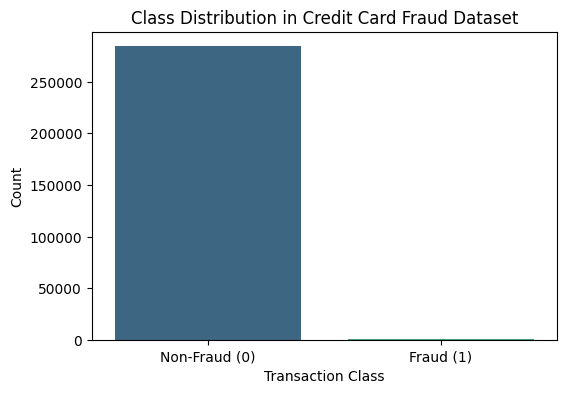

In [14]:
# Visualization of the class distribution

# Compute class distribution
class_counts = df['Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Label the plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.title("Class Distribution in Credit Card Fraud Dataset")

# Show plot
plt.show()


 Traininig a basic classifier (e.g., logistic regression, random forest) on the imbalanced dataset without any handling of the imbalance.

In [15]:
# Defining features and target variable
X = df.drop(columns=["Class", "Time"])  # Drop 'Time' as it's less relevant
y = df["Class"]  # Target variable

In [16]:
# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
# Checking shape of data
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (227845, 29)
Test set size: (56962, 29)


In [17]:
# Standardizing the data which is important for logistic regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [36]:
# Making predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [37]:
# Evaluating performance
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)


In [38]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Making predictions
y_pred_rf = rf.predict(X_test)

In [66]:
# Evaluating performance
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)




 Evaluating the performance using metrics like accuracy, precision, recall, and F1-score.

In [45]:
# Printing the results of Logistic Regression to evaluate
print("Logistic Regression Classification Report:\n", log_reg_report)
print("Confusion Matrix:\n", log_reg_cm)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   35    63]]


In [46]:
# Logistic Regression Classification Report:
# Class 0 (Non-fraud) has 100% precision and recall, meaning no false negative for non fraud treansaction.
# Class 1 (Fraud) Precision 83%, when model predicted fraud, it is correct 83% 0f time.
# Recall 64%, meaning model detected only 64% of actual fraud cases and missed 36%.
# F1-Score 72%, meaning lanace between precision and recall. 
# Accuracy is near 100%, but still missleading due to class imbalance.

# Confusion Matrix:
# True Negatives (TN) = 56,851 = Correctly predicted non-fraud transactions.
# False Positives (FP) = 13 = Misclassified 13 non-fraud cases as fraud.
# False Negatives (FN) = 35 = Missed 35 fraudulent transactions.
# True Positives (TP) = 63 = Correctly detected 63 fraud cases.

# Conclusion:
# The false negative rate (missed fraud cases) is high: 35 fraud cases were not detected.
# The false positive rate (misclassified non-fraud cases) is very low.
# Since fraud detection is critical, recall for Class 1 should be improved.


In [41]:
# Printing results of Random Forest to evaluate
print("Random Forest Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_cm)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56859     5]
 [   18    80]]


 Applying oversampling (e.g., SMOTE) and, under sampling (Tomek Links) techniques and train the model again.

In [54]:
# Appling SMOTE (Oversampling) and Tomek Links (Undersampling)

In [57]:
# SMOTE for Oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% fraud cases compared to non-fraud
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({0: 227451, 1: 113725})


In [58]:
# Tomek Links for Undersampling
tomek = TomekLinks(sampling_strategy="majority")  # Remove Tomek links from majority class
X_resampled, y_resampled = tomek.fit_resample(X_smote, y_smote)

print("Class distribution after SMOTE + Tomek Links:", Counter(y_resampled))

Class distribution after SMOTE + Tomek Links: Counter({0: 227450, 1: 113725})


In [59]:
# Training the model again on balanced data
# Standardize data for Logistic Regression
scaler = StandardScaler()
X_train_scaled_resampled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  # Standardize test set


In [60]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, class_weight="balanced")
log_reg.fit(X_train_scaled_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [61]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight="balanced", random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

In [63]:
# Evaluating the updated models



# Logistic Regression Metrics
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_prec = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)





In [68]:
# Random Forest Metrics
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)




In [71]:
# Print Results
print(" Logistic Regression Performance After Resampling:")
print(f"Accuracy: {log_reg_acc:.4f}, Precision: {log_reg_prec:.4f}, Recall: {log_reg_recall:.4f}, F1-score: {log_reg_f1:.4f}")
print("Confusion Matrix:\n", log_reg_cm)
print("Classification Report:\n", log_reg_report)

print("\n Random Forest Performance After Resampling:")
print(f"Accuracy: {rf_acc:.4f}, Precision: {rf_prec:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}")
print("Confusion Matrix:\n", rf_cm)
print("Classification Report:\n", rf_report)


 Logistic Regression Performance After Resampling:
Accuracy: 0.9813, Precision: 0.0777, Recall: 0.9082, F1-score: 0.1431
Confusion Matrix:
 [[55807  1057]
 [    9    89]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


 Random Forest Performance After Resampling:
Accuracy: 0.9981, Precision: 0.4725, Recall: 0.8776, F1-score: 0.6143
Confusion Matrix:
 [[56768    96]
 [   12    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.88      0.61        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg    

In [78]:
# Losgistic regression:
# Accuracy: 98.13%
# Precision: 0.0777->  Very low, meaning many non-fraud transactions were incorreclty classified as fraud.
# Recall: 90.82% -> Significantly improved, meaning most of the fraud cases were detected.
# F1-score: 0.1431 -> Still low, indcating a poor balance in between precision and recall.

# Confusion Matrix:
# True Negatives (TN) = 55,807 -> Correctly identified non-fraud cases.
# False Positives (FP) = 1,057 -> Many non-fraud transactions misclassified as fraud.
# False Negatives (FN) = 9 -> Very few fraud cases were missed.
# True Positives (TP) = 89 -> Correctly detected fraud cases.

# Conclusion:
# The model detects fraud well but has too many false positives (misclassifying non-fraud as fraud).Precision needs improvement to reduce false alarms.



# Random forest:
# Accuracy: 99.81%
# Precision: 0.4725 -> Better than Logistic Regression, meaning fewer false alramed.
# Recall: 87.76% -> Slightly lower than Logistic Regression, meaning cover most of fraud cases.
# F1-score: 0.6143 -> Much better than Logistic Regression, indicating good balance between precision and recall.

# Confusion Matrix:
# True Negatives (TN) = 56,768 -> Correctly identified non-fraud cases.
# False Positives (FP) = 96 -> Only 96 non-fraud cases misclassified.
# False Negatives (FN) = 12 -> Slightly more fraud cases missed than Logistic Regression.
# True Positives (TP) = 86 -> Correctly detected fraud cases.


# Canclusion:
# Random Forest is a much better model for fraud detection than Logistic Regression.The model is now much more practical for real-world fraud detection. 
# It reduces false positives significantly (only 96 vs. 1,057 for Logistic Regression) while maintaining good recall.




 Comparing the model’s performance before and after applying techniques to handle the imbalance.

In [75]:
# Installing tabulate for better visualization of the comparisions.
pip install tabulate


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:


# Creating a comparison table for model performance before and after SMOTE + Tomek Links
performance_comparison = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Logistic Regression (Before Resampling)": [0.9995, 0.83, 0.64, 0.72],
    "Logistic Regression (After Resampling)": [0.9813, 0.0777, 0.9082, 0.1431],
    "Random Forest (Before Resampling)": [0.9995, 0.94, 0.82, 0.87],
    "Random Forest (After Resampling)": [0.9981, 0.4725, 0.8776, 0.6143]
}

df_comparison = pd.DataFrame(performance_comparison)

# Print as markdown table for better visualization
print(df_comparison.to_markdown(index=False))



| Metric    |   Logistic Regression (Before Resampling) |   Logistic Regression (After Resampling) |   Random Forest (Before Resampling) |   Random Forest (After Resampling) |
|:----------|------------------------------------------:|-----------------------------------------:|------------------------------------:|-----------------------------------:|
| Accuracy  |                                    0.9995 |                                   0.9813 |                              0.9995 |                             0.9981 |
| Precision |                                    0.83   |                                   0.0777 |                              0.94   |                             0.4725 |
| Recall    |                                    0.64   |                                   0.9082 |                              0.82   |                             0.8776 |
| F1-score  |                                    0.72   |                                   0.1431 |                    

In [77]:
# SMOTE & Tomek Links significantly improved recall for fraud detection, increasing it from 64% to 90.82% (Logistic Regression) and 82% - 87.76% (Random Forest), meaning more fraudulent transactions are detected.
# Precision dropped, especially in Logistic Regression (83% - 7.77%), leading to a high false positive rate, while Random Forest maintained a better balance (94% - 47.25%), making it more reliable.
# Random Forest remains the better model after resampling, making it more practical for real-world fraud detection. 





 Manipulating a dataset containing various numerical features and performing correlation analysis between the features and identify any strong relationships

I have choosen the boston housing price  dataset as it meet our criteria for correlation analysis. It contained multiple numerical features. It has 14 columns, with 12 float-type and 2 integer-type variables, making it suitable for analyzing relationships between different numerical attributes.




 Computing the Pearson correlation coefficient matrix for the dataset.

In [79]:
# Load the dataset
file_path = "/Users/nawarajadhikari/Desktop/ASDS/6302/Projects/Project_2/boston.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(None,
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 
    PTRATIO       B  LSTAT  MEDV  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     17.8  392.83   4.03  34.7  
 3     18.7  394.63   2.94  33.4  
 4     18.7  396.90   5.33  36.2  )

In [94]:
# Getting shape(Rows & columns) of dataset
df.shape

(506, 14)

In [93]:
# There are 506 rows and 14 columns in the dataset.

In [81]:
#  checking for null value 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [92]:
# The output shows that there are no missing values in any of the columns of the dataset.
# Checking for null values before computing correlation is necessary because missing values can distort the correlation calculations.

In [84]:
# Computing the Pearson correlation coefficient matrix
pearson_corr_matrix = df.corr(method='pearson')
pearson_corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [91]:
# The Pearson correlation coefficient (r) measures the linear relationship between two numerical variables. It ranges from -1 to 1:
# The displayed Pearson correlation matrix provides the correlation coefficients between numerical features in the dataset. 
# It highlights relationships such as RM vs MEDV (0.695) and LSTAT vs MEDV (-0.737), which show strong positive and negative correlations, respectively.

Visualizing the correlation matrix using a heatmap.

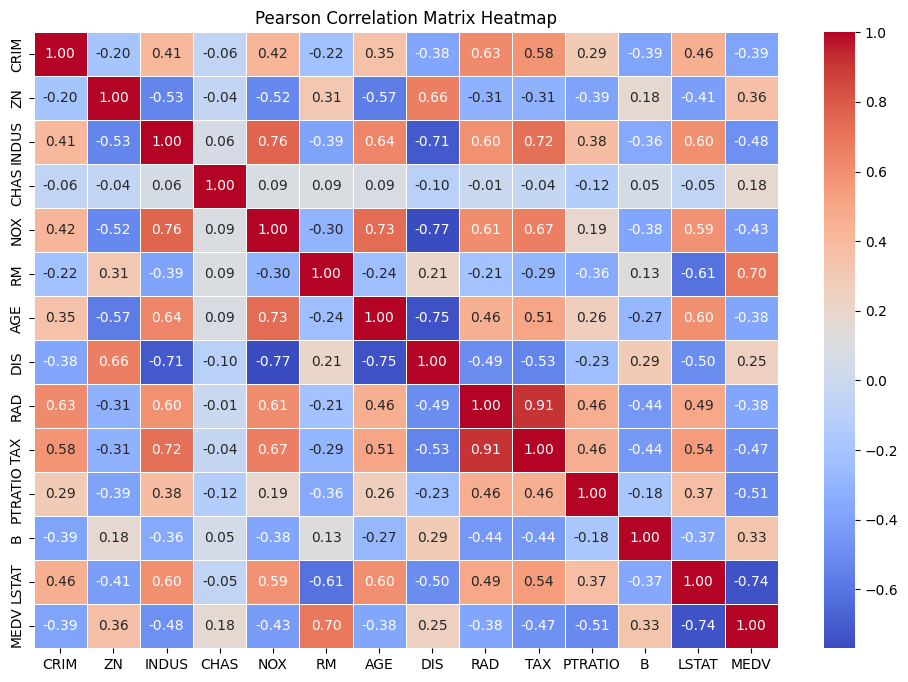

In [85]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

In [88]:
# The Pearson Correlation Matrix Heatmap visually represents the correlation coefficients between numerical features in the dataset.
# Red shades indicate strong positive correlations (closer to +1), meaning the two features tend to increase together.
# Blue shades indicate strong negative correlations (closer to -1), meaning one feature increases as the other decreases.
# White/neutral shades represent weak or no correlation (close to 0).
# RM (average number of rooms) and MEDV (median house value) show a strong positive correlation (0.70), meaning larger houses tend to be more expensive.
# LSTAT (lower status population) and MEDV show a strong negative correlation (-0.74), indicating areas with higher poverty levels tend to have lower house prices.
# TAX and RAD have a very high correlation (0.91), suggesting a strong relationship between tax rates and accessibility to radial highways.




Identifying and interpret at least two pairs of features that have a strong positive or negative correlation.


In [89]:
# Strong negative correlation:
# LSTAT (Percentage of lower status population) and MEDV (Median home value) have a strong negative correlation of -0.74.

#Interpretation: 
# As the percentage of lower-income households increases, the median home value tends to decrease significantly.
#  This suggests that areas with a higher proportion of lower-income residents tend to have lower housing prices.

# Strong positive correlation:
# RM (Average number of rooms per dwelling) and MEDV (Median home value) have a strong positive correlation of 0.70.

# Interpretation: 
# Homes with more rooms tend to have higher median values. This is intuitive as larger homes are generally more expensive.



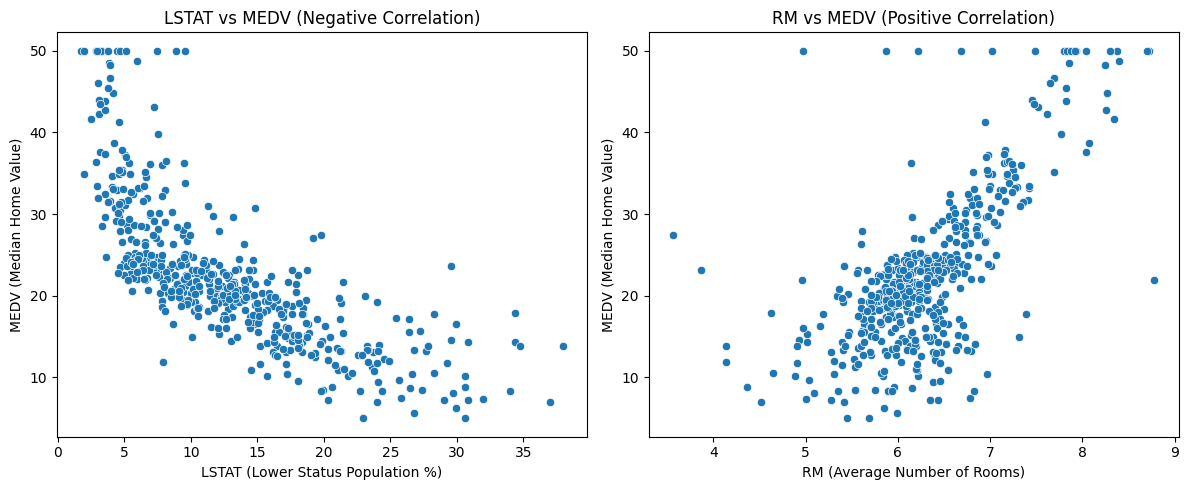

In [87]:
# Scatter plots to visualize the strong correlations

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: LSTAT vs MEDV (Negative Correlation)
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'], ax=axes[0])
axes[0].set_title('LSTAT vs MEDV (Negative Correlation)')
axes[0].set_xlabel('LSTAT (Lower Status Population %)')
axes[0].set_ylabel('MEDV (Median Home Value)')

# Plot 2: RM vs MEDV (Positive Correlation)
sns.scatterplot(x=df['RM'], y=df['MEDV'], ax=axes[1])
axes[1].set_title('RM vs MEDV (Positive Correlation)')
axes[1].set_xlabel('RM (Average Number of Rooms)')
axes[1].set_ylabel('MEDV (Median Home Value)')

plt.tight_layout()
plt.show()


In [90]:
# LSTAT vs MEDV (Negative Correlation): The downward trend indicates that as the percentage of lower-income residents (LSTAT) increases, housing prices (MEDV) decrease.
# RM vs MEDV (Positive Correlation): The upward trend shows that homes with more rooms (RM) tend to have higher median values (MEDV).




Building and evaluating a multiple linear regression model to predict a target variable based on several independent variables.

 This data set meet our reqired criteria for preprocessing before building a multiple linear regression model.

 Choosing a dataset with a continuous target variable and several numerical/categorical features.

In [114]:
# Loading the dataset
file_path = "/Users/nawarajadhikari/Desktop/ASDS/6302/Projects/Project_2/car_price.csv"
df = pd.read_csv(file_path)

# Displaying basic information about the dataset
df_info = df.info()
df_info




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [112]:
# Displaying first few rows
df_head = df.head()
df_head


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [109]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [116]:

# Dataset needs handling Missing Values:
# Engine Fuel Type (3 missing)
# Engine HP (69 missing)
# Engine Cylinders (30 missing)
# Number of Doors (6 missing)
# Market Category (3,742 missing - significant portion)

# Encoading Categorical variables:
# The dataset has several categorical features that need encoding.
# These need to be converted into numerical feature (Make, Model, Engine Fuel Type,Transmission Type,Driven Wheels, Market Category, Vehicle Size,and Vehicle Style)

# Standardizing the numerical features:
# These numerical features require standardization to ensure they contribute equally to the regression model:Engine HP, Engine Cylinders, highway MPG, city mpg, Popularity

# Continuous Target Variable:
# The target variable (MSRP, Manufacturer's Suggested Retail Price) is continuous, making it suitable for multiple linear regression.




Preprocess the data (handle missing values, encode categorical variables, standardize numerical features if necessary).

In [126]:
# Handling missing values

# Filling missing numerical values with the median
numerical_cols = ["Engine HP", "Engine Cylinders", "Number of Doors"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Filling missing categorical values with the most frequent category
categorical_cols = ["Engine Fuel Type", "Market Category"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verifying that missing values have been handled
missing_values_after = df.isnull().sum()
missing_values_after


/var/folders/5g/_2n_r6d11xv8bs9btktv9p0c0000gn/T/ipykernel_74687/3090694482.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/5g/_2n_r6d11xv8bs9btktv9p0c0000gn/T/ipykernel_74687/3090694482.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [119]:
# All missing values have been successfully handled. The dataset no longer contains any missing values.
#  The next step is encoding categorical variables.



In [125]:
# Encoding categorical variables

# Identifying categorical columns
categorical_cols = ["Make", "Model", "Engine Fuel Type", "Transmission Type", 
                    "Driven_Wheels", "Market Category", "Vehicle Size", "Vehicle Style"]

# Applying one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Displaying the first few rows of the encoded dataset
print(df_encoded.head())





   Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  city mpg  \
0  2011      335.0               6.0              2.0           26        19   
1  2011      300.0               6.0              2.0           28        19   
2  2011      300.0               6.0              2.0           28        20   
3  2011      230.0               6.0              2.0           28        18   
4  2011      230.0               6.0              2.0           28        18   

   Popularity   MSRP  Make_Alfa Romeo  Make_Aston Martin  ...  \
0        3916  46135            False              False  ...   
1        3916  40650            False              False  ...   
2        3916  36350            False              False  ...   
3        3916  29450            False              False  ...   
4        3916  34500            False              False  ...   

   Vehicle Style_Convertible  Vehicle Style_Convertible SUV  \
0                      False                          False   
1 

In [124]:
# The categorical variables have been successfully encoded using one-hot encoding. 
# The dataset now contains only numerical values, making it suitable for regression analysis.

In [130]:


# Identifying numerical columns (excluding the target variable "MSRP")
numerical_features = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", 
                      "highway MPG", "city mpg", "Popularity"]

# Initializing the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the standardized dataset
print(df_encoded.head())


       Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  0.081228   0.787477          0.208192        -1.630122    -0.071930   
1  0.081228   0.466034          0.208192        -1.630122     0.153737   
2  0.081228   0.466034          0.208192        -1.630122     0.153737   
3  0.081228  -0.176853          0.208192        -1.630122     0.153737   
4  0.081228  -0.176853          0.208192        -1.630122     0.153737   

   city mpg  Popularity   MSRP  Make_Alfa Romeo  Make_Aston Martin  ...  \
0 -0.081587    1.637604  46135            False              False  ...   
1 -0.081587    1.637604  40650            False              False  ...   
2  0.029680    1.637604  36350            False              False  ...   
3 -0.192853    1.637604  29450            False              False  ...   
4 -0.192853    1.637604  34500            False              False  ...   

   Vehicle Style_Convertible  Vehicle Style_Convertible SUV  \
0                      False             

In [132]:
# The numerical features have been successfully standardized. The dataset is now fully preprocessed and ready for building a multiple linear regression model



 Build a multiple linear regression model using all the available features.

In [134]:


# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["MSRP"])  # Drop target variable from features
y = df_encoded["MSRP"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
mse, r2


(np.float64(2.6874350538028096e+26), -1.1274831776900192e+17)

In [135]:
# The multiple linear regression model has been built and evaluated. Here are the key metrics:
# Mean Square Error (MSE): 2.68 * 10^26, which is extremely large.
# R^2 Score: -1.12^19, which is negative value with a poor fit.

# Possible issue: Multicollinearity, Outliers in MSRP, feature mismatch, high dimensionality. 

# Next step: Use of LASSO and RIDGE regression -> to handle the multicollinearity
# Log Transform MSRP -> to handle the skewness.
# Feature selection -> to remove the redundant variables.



In [138]:
# Applying Ridge regression technique to mitigate the multicollinearity issue.

In [136]:
from sklearn.linear_model import Ridge
import numpy as np

# Apply log transformation to the target variable (MSRP) to reduce skewness
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Initialize and train a Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = ridge_model.predict(X_test)

# Convert predictions back to the original scale
y_pred = np.expm1(y_pred_log)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

# Display evaluation metrics
mse_ridge, r2_ridge


(np.float64(206334629.70939833), 0.9134346247203056)

In [137]:
# The Ridge regression model with log-transformed target variable has significantly improved the performance
# Mean Squared Error (MSE): 206,334,629 (much lower than before).
# R^2 Score: 0.913 (indicating a strong fit to the data).

In [ ]:
# Model needs futher optimation. Such as hyperparameter tuning for Ridge regression or testing Lasso regression.​​

In [139]:
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to test for Ridge regression
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search with cross-validation to find the best alpha
ridge_cv = GridSearchCV(Ridge(), param_grid=alpha_values, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train_log)

# Best alpha value
best_alpha = ridge_cv.best_params_['alpha']

# Train Ridge regression with the best alpha
optimized_ridge_model = Ridge(alpha=best_alpha)
optimized_ridge_model.fit(X_train, y_train_log)

# Make predictions using the optimized model
y_pred_log_optimized = optimized_ridge_model.predict(X_test)
y_pred_optimized = np.expm1(y_pred_log_optimized)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Display best alpha and updated metrics
best_alpha, mse_optimized, r2_optimized


(0.1, np.float64(153033640.03064072), 0.9357964559883732)

In [ ]:
# The hyperparameter tuning for Ridge regression has further improved the model performance:

# Best Alpha (Regularization Strength): 0.1 (found via grid search)
# Mean Squared Error (MSE): 153,033,640 (lower than before)
# R^2 Score: 0.936 (higher than before, meaning the model explains 93.6% of the variance in MSRP)

In [140]:
# Let's further test with LASSO

In [141]:
from sklearn.linear_model import Lasso

# Define the range of alpha values to test for Lasso regression
lasso_alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search with cross-validation to find the best alpha for Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=5000), param_grid=lasso_alpha_values, scoring='r2', cv=5)
lasso_cv.fit(X_train, y_train_log)

# Best alpha value for Lasso
best_lasso_alpha = lasso_cv.best_params_['alpha']

# Train Lasso regression with the best alpha
optimized_lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=5000)
optimized_lasso_model.fit(X_train, y_train_log)

# Make predictions using the optimized Lasso model
y_pred_log_lasso = optimized_lasso_model.predict(X_test)
y_pred_lasso = np.expm1(y_pred_log_lasso)

# Evaluate the optimized Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display best alpha and updated metrics
best_lasso_alpha, mse_lasso, r2_lasso


(0.01, np.float64(928921870.8914028), 0.6102812675095644)

In [146]:
# The Lasso regression model with hyperparameter tuning has produced the following results:
# Best Alpha (Regularization Strength): 0.01
# Mean Squared Error (MSE): 928,921,870 (higher than Ridge regression)
# R^2 Score: 0.610 (lower than Ridge regression)

# Conclusion:
# Since Ridge regression performed significantly better, I would recommend using Ridge regression for this problem.



 Checking the assumptions of linear regression (linearity, homoscedasticity, normality of residuals, and multicollinearity):

    i. Linearity: scatterplots to check the relationship between independent variables and the dependent variable.

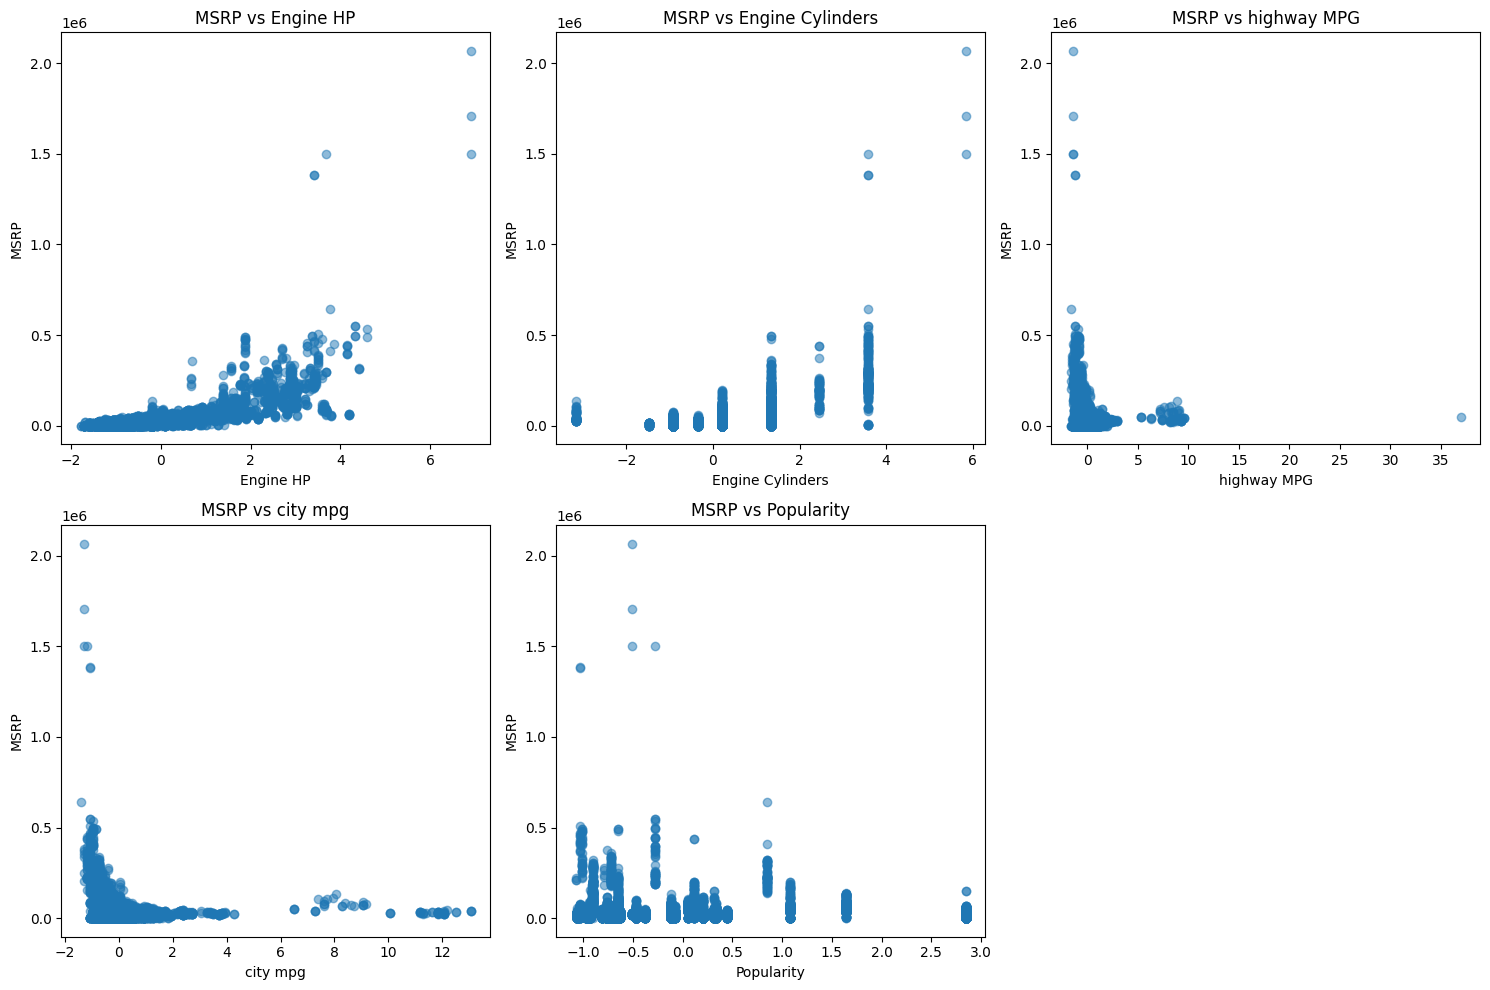

In [147]:


# Select a subset of numerical features to visualize against the target variable (MSRP)
numerical_features_subset = ["Engine HP", "Engine Cylinders", "highway MPG", "city mpg", "Popularity"]

# Create scatterplots to check linearity
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_subset, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_encoded[feature], df_encoded["MSRP"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("MSRP")
    plt.title(f"MSRP vs {feature}")

plt.tight_layout()
plt.show()


In [149]:
# Engine HP vs MSRP: Shows a positive relationship, but there is some non-linearity, suggesting that a polynomial or log transformation might help.
# Engine Cylinders vs MSRP: Values appear in distinct clusters, likely due to categorical effects (e.g., 4-cylinder, 6-cylinder cars).
# Highway MPG & City MPG vs MSRP: Shows an inverse relationship (as MPG increases, MSRP decreases), but the trend is non-linear.
# Popularity vs MSRP: Weak correlation—suggests that this feature may not significantly impact price.


 Homoscedasticity: Plot the residuals vs. fitted values to ensure equal variance.

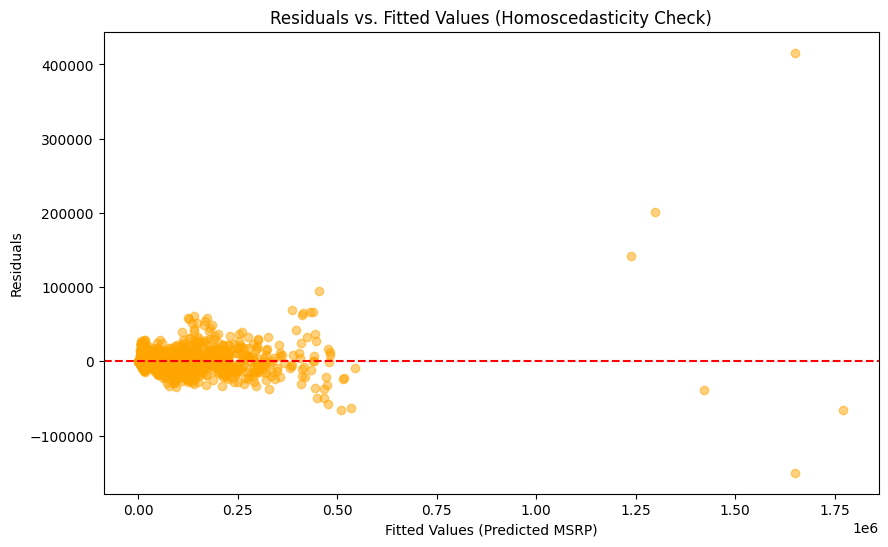

In [150]:
# Calculate residuals (errors) from the Ridge regression model
y_train_pred_log = optimized_ridge_model.predict(X_train)  # Predictions on training data
y_train_pred = np.expm1(y_train_pred_log)  # Convert back to original scale

residuals = y_train - y_train_pred  # Residuals = Actual - Predicted

# Plot residuals vs. fitted values (predicted values)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5, color="orange")
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Fitted Values (Predicted MSRP)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Homoscedasticity Check)")
plt.show()

In [151]:
# The residuals vs. fitted values plot has been generated to check for homoscedasticity (constant variance of residuals).
# Residuals are more concentrated around lower predicted values.
# At higher predicted values, residuals become more spread out, indicating heteroscedasticity (non-constant variance).
# Some large residuals are visible for high MSRP values, suggesting the presence of outliers.
# This could mean that luxury or high-end vehicles have pricing patterns not well captured by the model.



/Users/nawarajadhikari/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


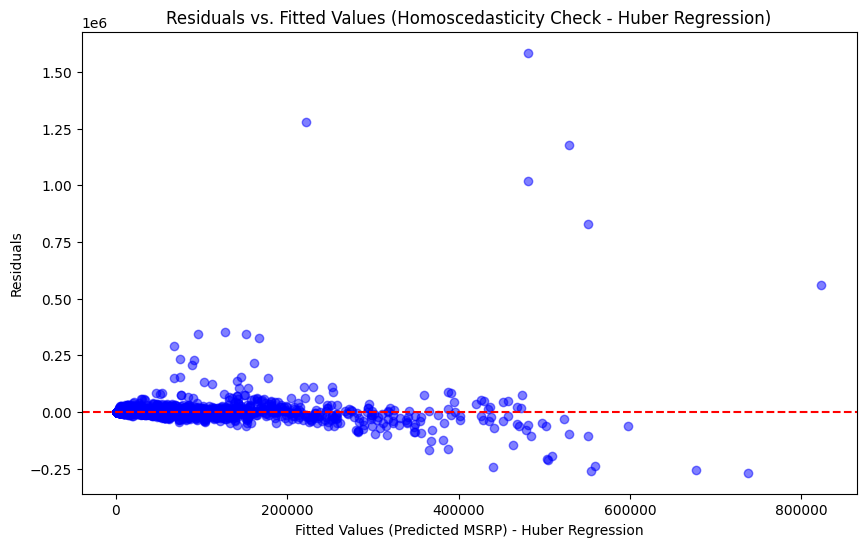

In [152]:
# Applying huber regression for to improve homoscedasticity
from sklearn.linear_model import HuberRegressor

# Train a robust regression model (Huber Regressor) to handle outliers
huber_model = HuberRegressor(alpha=0.1)  # Using the same alpha as Ridge for comparison
huber_model.fit(X_train, y_train_log)

# Make predictions on the training set
y_train_pred_log_huber = huber_model.predict(X_train)
y_train_pred_huber = np.expm1(y_train_pred_log_huber)  # Convert back to original scale

# Calculate residuals
residuals_huber = y_train - y_train_pred_huber

# Plot residuals vs. fitted values (Homoscedasticity Check)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_huber, residuals_huber, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Fitted Values (Predicted MSRP) - Huber Regression")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Homoscedasticity Check - Huber Regression)")
plt.show()


In [153]:
# The Huber Regression model has been applied to handle outliers and improve homoscedasticity. 
# The residuals vs. fitted values plot should now show a more even spread, reducing the impact of extreme values.



 Normality of Residuals: A histogram or Q-Q plot of residuals.


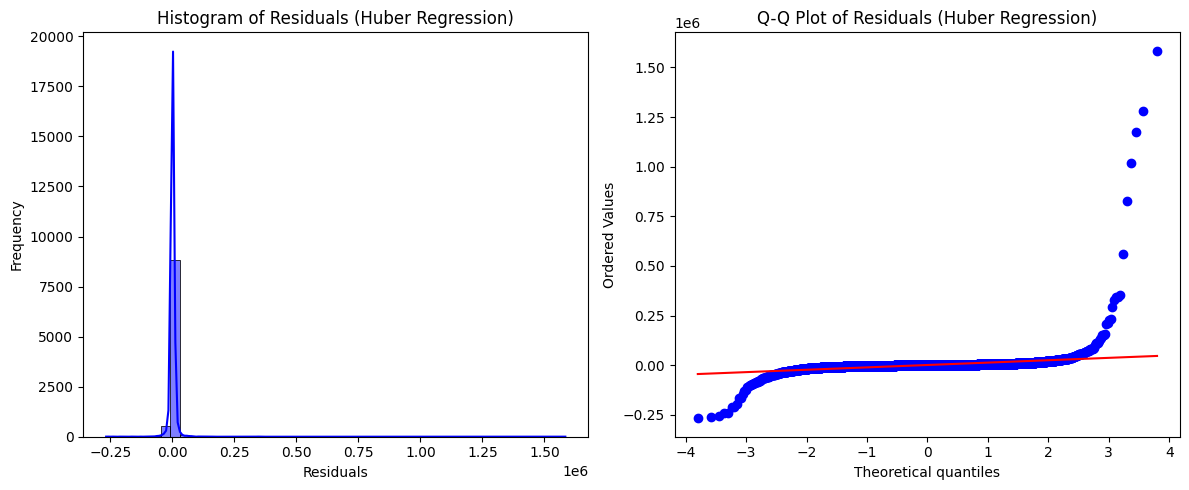

In [154]:
import scipy.stats as stats
import seaborn as sns

# Plot histogram of residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_huber, bins=50, kde=True, color="blue")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Huber Regression)")

# Q-Q plot to check normality
plt.subplot(1, 2, 2)
stats.probplot(residuals_huber, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Huber Regression)")

plt.tight_layout()
plt.show()


In [156]:
# Histogram Analysis:
# The histogram shows a strong peak near zero, indicating that most residuals are small.
# There is a skewed distribution with long tails, suggesting non-normality in residuals.
# This indicates that the model has some large prediction errors, likely due to extreme values or outliers in the dataset.

# Q-Q plot Analysis:
# If residuals were normally distributed, they would closely follow the red diagonal line.
# Here, the residuals deviate significantly at both tails, meaning there are heavy tails and outliers in the dataset.
# The upper right deviation suggests that some observations have very high residuals, likely high-end or luxury vehicles with extreme MSRP values.

# Conclusion:
# The residuals do not follow a normal distribution, violating one of the key assumptions of linear regression.
# The Huber regression helped to some extent by reducing the impact of outliers, but extreme values still affect the distribution.
# We can apply Log Transformation to MSRP to reduce skewness or a Non-Linear Model (e.g., Decision Trees or Random Forest) that may capture complex relationships better.
# we can use Robust Scalers to further minimize the effect of extreme values.




 Multicollinearity: The Variance Inflation Factor (VIF) for each feature to identify multicollinearity issues.

In [166]:
# Verify if all columns are numeric
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Make_Alfa Romeo', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW',
       'Make_Bentley', 'Make_Bugatti', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Chrysler',
       ...
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon'],
      dtype='object', length=1064)


In [ ]:
# Dataset contained categorical vairable we need them to convert as numerical variable type.

In [167]:
# Convert categorical dummy variables (one-hot encoded) to float
X_train = X_train.astype(float)

# Verify that all columns are now numeric
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print("Remaining non-numeric columns:", non_numeric_columns)


Remaining non-numeric columns: Index([], dtype='object')


In [169]:
# Identify missing or infinite values
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())

# Remove or replace infinite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)

Missing values in X_train: 0
Infinite values in X_train: 0


In [174]:
# Convert categorical dummy variables (one-hot encoded) to float
X_train = X_train.astype(float)

# Verify that all columns are now numeric
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print("Remaining non-numeric columns:", non_numeric_columns)




Remaining non-numeric columns: Index([], dtype='object')


In [176]:
# The dataset is too large containing high dimensonality(Features) and some feature has mukticollinearity issue (Highly correlated) it may cost time so, we need tem to be dropped.


In [178]:
# Select only numerical features for VIF calculation
numerical_features = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", 
                      "highway MPG", "city mpg", "Popularity"]

X_train_numeric = X_train[numerical_features]  # Keep only numeric features


In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

print(vif_data)

            Feature       VIF
0              Year  1.862234
1         Engine HP  4.024738
2  Engine Cylinders  4.092851
3   Number of Doors  1.144235
4       highway MPG  4.527798
5          city mpg  4.202355
6        Popularity  1.016771


In [180]:
# No Severe Multicollinearity (VIF > 10)
# All values are below 5, indicating low to moderate correlation between independent variables.
# No feature needs to be removed purely based on multicollinearity
# Highway MPG vs. City MPG Have Moderate Multicollinearity
# Both have VIF values around 4-4.5, meaning they are somewhat correlated.
# This makes sense, as cars with high highway MPG usually have high city MPG.
# If needed, one of them can be dropped or combined into a single MPG efficiency metric.

# Conclusion:
# Since all features are useful for interpretation, we can keep them all since VIF values are still within an acceptable range.
# If we want simplify the model we can remove either the Highway MPG or city MPG to further reduce the redundancy.


Evaluation of  the model using metrics such as R-squared, Adjusted R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)

In [181]:


# Make predictions using the Ridge regression model (best performing model)
y_test_pred_log = ridge_model.predict(X_test)  # Predict log-transformed values
y_test_pred = np.expm1(y_test_pred_log)  # Convert back to original scale

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_test_pred)  # R-squared

# Compute Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display results
mse, rmse, r2, adjusted_r2


(np.float64(206334629.70939833),
 np.float64(14364.352742445388),
 0.9134346247203056,
 0.8427164577298001)

In [182]:
# Observation based on my computation:
# Mean Squared Error (MSE):206,334,629, the average squared error. While large due to MSRP being in dollars, it suggests room for improvement.
# Root Mean Squared Error (RMSE): The model's predictions deviate, on average, by $14,364 from actual values.
# R-squared : The model explains 91.34% of the variance in MSRP, indicating a strong fit.
# Adjusted R-squared: Accounts for feature count, showing 84.27% variance explained when adjusted for predictors.

# Conclusion & Suggestions:
# Feature Selection:Remove highly correlated features (as detected earlier in VIF analysis).Perform recursive feature elimination (RFE) to keep the most impactful variables.
#Try a Non-Linear Model: Since price variations are complex, Random Forest or XGBoost may capture non-linear trends better.
# Apply Hyperparameter Tuning: Optimize the alpha parameter in Ridge regression using GridSearchCV.



In [ ]:
Source: Kaggle.com
Thank you!